#Shopify Summer 2022 Data Science Intern Challenge

In [1]:
import pandas as pd # Importing the required libraries
import matplotlib.pyplot as plt
df = pd.read_csv("2020 Summer Data Science Intern Challenge Data Set - Sheet1.csv", index_col="order_id") # read csv data file

First five rows of the dataset.

In [2]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


Dataset has 5000 rows and 6 columns.

In [4]:
df.shape

(5000, 6)

Average Order Value

In [5]:
df['order_amount'].sum()/len(df)

3145.128

Yes, the AOV of $3145.128 for sneaker shops seems to be very high. Let's examine the order_amount further.

In [14]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From the above description of order_amount column, we can see that 75% of the order_amount is less than $390. Let's examine the quartiles of order_amount further.

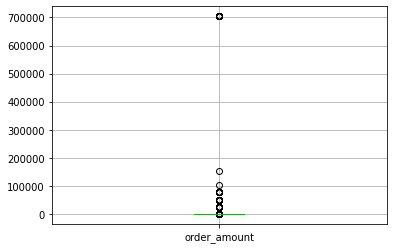

In [29]:
df.boxplot(column='order_amount')

From the above boxplot we can see that most of the observations are concentrated around 0 and there are many outliers which are skewing the AOV. Let's look at the outliers.

Let's look at correlation between order_amount and total_items which I feel should be highly correlates as order_amount increases with increase in total_items.

In [53]:
df['order_amount'].corr(df['total_items'])

0.9917468694158071

In [35]:
highest_order_amount = df.sort_values(by='order_amount', ascending=False)
highest_order_amount.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00


In [44]:
order_amounts_and_counts = df.groupby(['order_amount']).size().reset_index(name='frequency').sort_values(by='order_amount', ascending=False)
order_amounts_and_counts.head(10)

,order_amount,frequency
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [49]:
df['order_amount'].quantile(.98)

800.0799999999981

We can see that 98% of the order_amount values are under $800.

Computing the inter-quartile range to find the outliers and removing them.

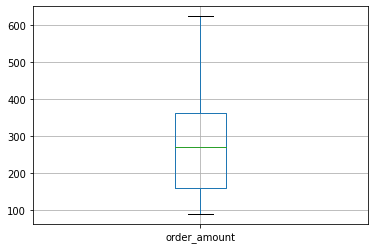

In [50]:
q1 = df['order_amount'].quantile(q=0.25)
q2 = df['order_amount'].quantile(q=0.50)
q3 = df['order_amount'].quantile(q=0.75)
IQR = q3 - q1
new_df = df[(df['order_amount'] < q2 + IQR * 1.5) & (df['order_amount'] > q2 - IQR * 1.5)]
new_df.boxplot(column='order_amount')

In [48]:
new_df['order_amount'].describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

From the above boxplot and order_amount description we can see that median order_amount is 272 and max is 624.

#a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
#b. What metric would you report for this dataset?
#c. What is its value?


a. Not treating the outliers was skewing the AOV. In order to evaluate this data better, we need to treat the outliers.

b. I would consider median as a metric.

c. After treating the outliers using IQR, the resulting dataset has a median order_amount of $272.

#Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

54

In [ ]:
SELECT COUNT(*) as speedyexpress_total_orders
FROM Shippers as s
LEFT JOIN Orders as o
ON s.ShipperID = o.ShipperID
WHERE ShipperName = "Speedy Express"

b. What is the last name of the employee with the most orders?

Peacock

In [ ]:
SELECT LastName 
FROM Orders o JOIN Employees e ON o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY COUNT(*) DESC
LIMIT 1

c. What product was ordered the most by customers in Germany?

Boston Crab Meat 160

In [ ]:
SELECT p.ProductName, SUM(od.Quantity)
FROM Products as p
LEFT JOIN OrderDetails as od
ON p.ProductID = od.ProductID
LEFT JOIN Orders as o
ON od.OrderID = o.OrderID
LEFT JOIN Customers as c
ON o.CustomerID = c.CustomerID
WHERE c.Country = "Germany"
GROUP BY p.ProductName
ORDER BY SUM(od.Quantity) DESC
LIMIT 1